In [1]:
# import necessary modules and check if gpu is available
import torch, torchvision
import matplotlib.pyplot as plt
import torch.nn.functional as F
print(torch.cuda.is_available())

True


In [2]:
# load MNIST dataset and create a dataloader

mnist = torchvision.datasets.MNIST('./', train=True, download=True, transform=torchvision.transforms.ToTensor())
loader =  torch.utils.data.DataLoader(mnist, batch_size=16, shuffle=True)

In [3]:
# create a 2 layer neural net on gpu
class TwoLayerNetwork(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.layer1 = torch.nn.Linear(784, hidden_dim)
        self.layer2 = torch.nn.Linear(hidden_dim, 10)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.layer2(x)
        return x
        
net = TwoLayerNetwork(hidden_dim=256).cuda()

dummy_input = torch.randn(16, 784).cuda()
dummy_output = net(dummy_input)

print('Input shape: [batch size, input size]:')
print(dummy_input.shape)

print('Output shape: [batch size, output size]:')
print(dummy_output.shape)


Input shape: [batch size, input size]:
torch.Size([16, 784])
Output shape: [batch size, output size]:
torch.Size([16, 10])


Training started.
Epoch 1...
Epoch 2...
Epoch 3...
Training finished.


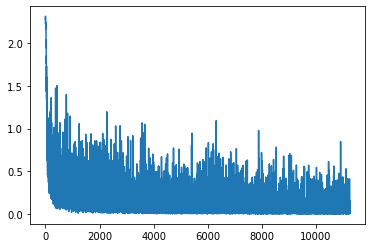

In [4]:
# train the model for 3 epochs
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
NUM_EPOCHS = 3

loss_list = []

print('Training started.')
for epoch in range(NUM_EPOCHS):
    print(f'Epoch {epoch+1}...')
    for imgs, labels in loader:
        imgs, labels = imgs.cuda(), labels.cuda() #transfer batch to GPU
        imgs_flat = imgs.view(-1, 784) #flatten images to feed network
        scores = net(imgs_flat) 
        loss = loss_function(scores, labels)
        optimizer.zero_grad() #clear grads
        loss.backward() #compute grads
        loss_list.append(loss.item()) #append loss value to list for plotting
        optimizer.step() 

print('Training finished.')
    
plt.plot(loss_list); plt.show() #display the iteration-loss plot
#Note that it may look noisy without smoothing the curve

Image:


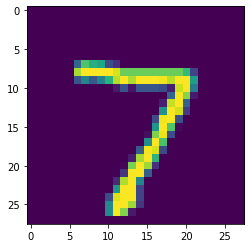

Network Prediction:
7
Ground Truth:
7
-----
Image:


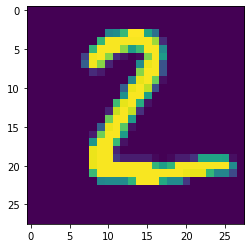

Network Prediction:
2
Ground Truth:
2
-----
Image:


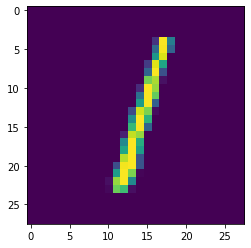

Network Prediction:
1
Ground Truth:
1
-----
Image:


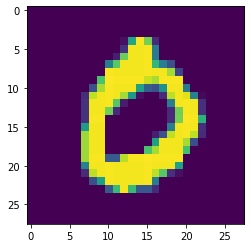

Network Prediction:
0
Ground Truth:
0
-----
Image:


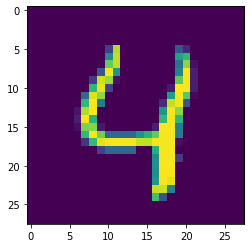

Network Prediction:
4
Ground Truth:
4
-----
Image:


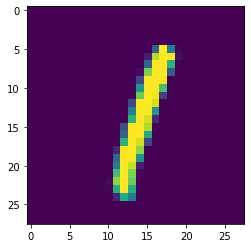

Network Prediction:
1
Ground Truth:
1
-----
Image:


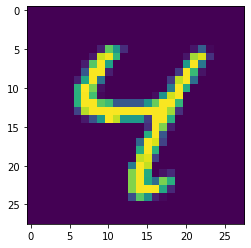

Network Prediction:
4
Ground Truth:
4
-----
Image:


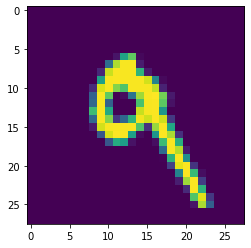

Network Prediction:
9
Ground Truth:
9
-----


In [5]:
# check the network decisions on some inputs

def torch_imshow(img):
    img = img[0]
    plt.imshow(img.cpu().numpy())
    plt.show()

    
#prepare test set and dataloader
mnist_test = torchvision.datasets.MNIST('./', train=False, download=True, transform=torchvision.transforms.ToTensor())
test_loader =  torch.utils.data.DataLoader(mnist_test, batch_size=8)

test_imgs, test_labels = iter(test_loader).next() #sample the first batch from test set

test_imgs, test_labels = test_imgs.cuda(), test_labels.cuda() 
test_imgs_flat = test_imgs.view(-1, 784)
scores = net(test_imgs_flat)
predictions = torch.argmax(scores, dim=-1) #get argmax of the scores for each sample in the batch

#visualize with network predicted classes and labels
for n in range(len(test_imgs)):
    print('Image:')
    torch_imshow(test_imgs[n])
    print('Network Prediction:')
    print(predictions[n].item())
    print('Ground Truth:')
    print(test_labels[n].item())
    print('-----')
    
    
    
    
